# In Class Assignment 7 - ME 364 (Spring 2022)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
from dtreeviz.trees import dtreeviz 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

<font color='red'>__Question (1)__</font>: Using the dataset we used in the class notebook, develop your own classifier using features `X_Minimum`, `X_Maximum`, `Y_Minimum`, `Y_Maximum`, `Pixels_Areas`, `X_Perimeter`, `Y_Perimeter`, `Sum_of_Luminosity`, `Minimum_of_Luminosity`, `Maximum_of_Luminosity`, `TypeOfSteel_A300`, `TypeOfSteel_A400`, `Steel_Plate_Thickness` to make prediction about `Stains` type of fault for steel plates. Visualize your developed tree

In [4]:
url = ('https://raw.githubusercontent.com/MasoudMiM/ME_364/main/Steel_Plates_Faults/Data.csv')
df = pd.read_csv(url,names=['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
                            'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
                            'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
                            'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
                            'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
                            'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch',
                            'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])  
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [6]:
# Check to see if there are missing values in the dataset
df.isnull().sum().sum()

0

In [8]:
features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
             'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
             'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness']
x_data=np.array(df[features])
y_data=df['Stains']
df['Stains'].unique()


array([0, 1])

Target variable distribution:
0    1869
1      72
Name: Stains, dtype: int64


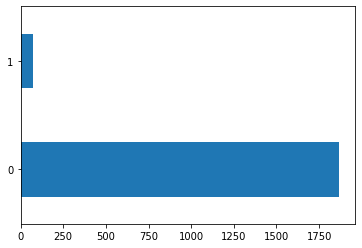

In [9]:
print('Target variable distribution:')
print( df['Stains'].value_counts() )

df['Stains'].value_counts().plot(kind='barh')

In [10]:
MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.3)
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dt.fit(x_train,y_train)
yhatTest=dt.predict(x_test)
yhatTrain=dt.predict(x_train)
dt.classes_

array([0, 1])

In [11]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 156 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.5-py3-none-any.whl size=67330 sha256=5d9e64f44eb320918f6590a27c323e3da6362c6f7ee2e3afa663573e5e4a741f
  Stored in directory: /root/.cache/pip/wheels/9d/84/55/4de0a214e0b9d21a96fc343b4a85547f3dab815a49682dfeb2
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

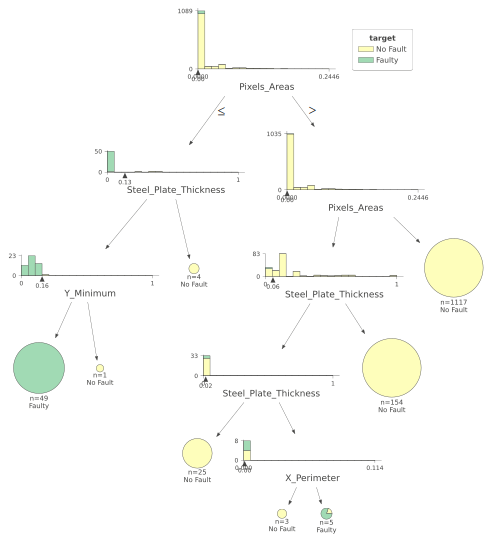

In [13]:
dtviz = dtreeviz(dt, x_train, y_train,
                target_name="target",
                feature_names=features,
                class_names=('No Fault', 'Faulty'))

dtviz

<font color='red'>__Question (2)__</font>: Evaluate the performance of your own model developed in Question (1) using Jaccard Index, F-Score, Log Loss, and Confusion Matrix.

In [16]:
J_scoreTrain = jaccard_score(y_train,yhatTrain)
J_scoreTest = jaccard_score(y_test,yhatTest)
print(f'Jaccard index for training data is {J_scoreTrain:0.3f}')
print(f'Jaccard index for the test data is {J_scoreTest:0.3f}')

F_scoreTrain = f1_score(y_train,yhatTrain)
F_scoreTest = f1_score(y_test,yhatTest)
print(f'F-score for training data is {F_scoreTrain:0.3f}')
print(f'F-score for the test data is {F_scoreTest:0.3f}')

LogLossTrain = log_loss(y_train,yhatTrain)
LogLossTest = log_loss(y_test,yhatTest)
print(f'Log Loss for training data is {LogLossTrain:0.3f}')
print(f'Log loss for the test data is {LogLossTest:0.3f}')

print('Confusion matrix for training data')
CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   # possible option normalize='true'
print(CM_scoreTrain)

print(40*'-')

print('Confusion matrix for test data')
CM_scoreTest = confusion_matrix(y_test,yhatTest)   # possible option normalize='true'
print(CM_scoreTest)

Jaccard index for training data is 0.981
Jaccard index for the test data is 0.850
F-score for training data is 0.991
F-score for the test data is 0.919
Log Loss for training data is 0.025
Log loss for the test data is 0.178
Confusion matrix for training data
[[1304    1]
 [   0   53]]
----------------------------------------
Confusion matrix for test data
[[563   1]
 [  2  17]]


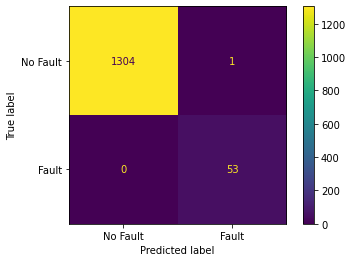

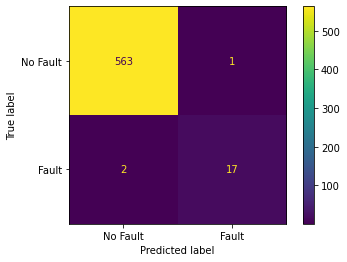

In [17]:
dispTr = ConfusionMatrixDisplay(CM_scoreTrain,display_labels=['No Fault','Fault']) # 
dispTr.plot()

dispTs = ConfusionMatrixDisplay(CM_scoreTest,display_labels=['No Fault','Fault'])
dispTs.plot()